# PPO in Mountain Car Environment

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

from rlforge.environments import Pendulum
from rlforge.agents.policy_gradient import PPODiscrete
from rlforge.experiments import ExperimentRunner

In [27]:
import torch
if torch.cuda.is_available():
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
else:
    print("CUDA is not available.")

Number of CUDA devices: 1


In [28]:
env = gym.make("CartPole-v1")
agent = PPODiscrete(
    state_dim=env.observation_space.shape[0],  
    num_actions=env.action_space.n,       
    actor_lr=0.0003,
    critic_lr=0.002,
    discount=0.99,
    clip_epsilon=0.2,
    network_architecture=[64,64],
    update_epochs=10,
    mini_batch_size=64,
    rollout_length=1024,
    value_coef=0.5,
    entropy_coeff=0.01,
    device='cpu'
)

In [29]:
runner = ExperimentRunner(env, agent)

results = runner.run_episodic(
    num_runs=5,
    num_episodes=500,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

KeyboardInterrupt: 

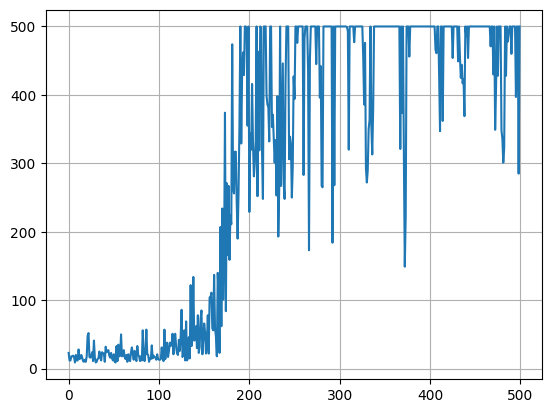

In [ ]:
runs_std = np.std(rewards, axis=1)
runs_mean = np.mean(rewards, axis=1)
lower_bound = runs_mean - runs_std
upper_bound = runs_mean + runs_std
plt.plot(runs_mean)
plt.fill_between(np.arange(len(runs_mean)), lower_bound, upper_bound, alpha=0.3)
plt.grid()